In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# De scikit-learn...

In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
data = pd.read_csv(file_path, sep=',',engine='python')

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas. 

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.


In [3]:
### Vista de datos
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [4]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

Tenemos 18 variables numéricas (enteros y flotantes) y 7 variables que son de tipo objeto, lo cual significa significa que puede contener cualquier tipo de objeto en Python, ya sea un entero, una cadena, una lista, una función, una clase, o cualquier otro objeto. Estas variables que las consideramos categóricas las trabajaremos más adelante

In [6]:
#obtenemos medias de tendencia central y dispersión 
data.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
### Cantidad de valores faltantes.

data.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [8]:
#son dos formas distintas de calcular lo mismo, podríamos borrar uno
data.isnull().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

Con respecto a los valores faltantes los trataremos luego, principalmente tomamos alguna decisión al respecto de como compeltar estos datos.

In [9]:
#Chequeamos que ciudades contiene nuestro data set
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
#Nos quedamos con las ciudades requeridas 
data['Flag'] = data['Location'].apply(lambda x: 'si' if x in ["Sydney", "SydneyAirport", "Canberra", "Melbourne", "MelbourneAirport"] else 'no')

In [11]:
mask = data['Flag'] == "si"
#Pisamos el data set solo con los datos de las ciudadeds requeridas
data = data[mask]

In [12]:
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Flag
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0,si
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6,si
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8,si
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4,si
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6,si


<Axes: xlabel='Location'>

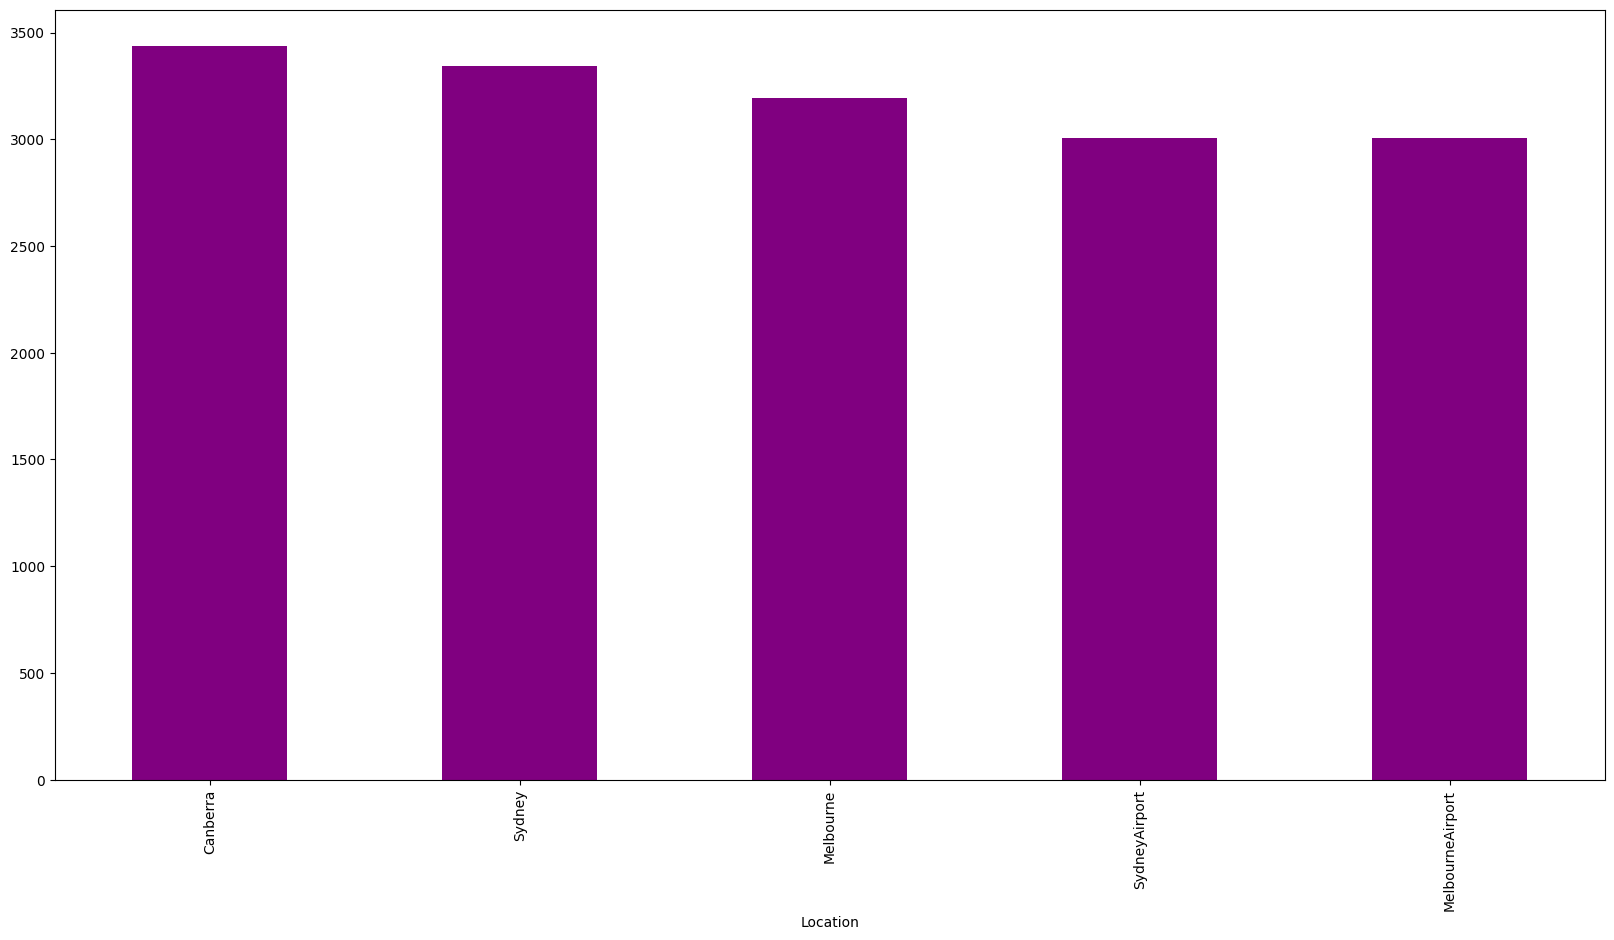

In [13]:
#Analizamos la cantidad de veces que aparece cada dato y luego graficamos de formas descendente
top = data['Location'].value_counts().sort_values(ascending=False)[0:30]

top.plot(kind='bar', color = 'purple', figsize=(20, 10))

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

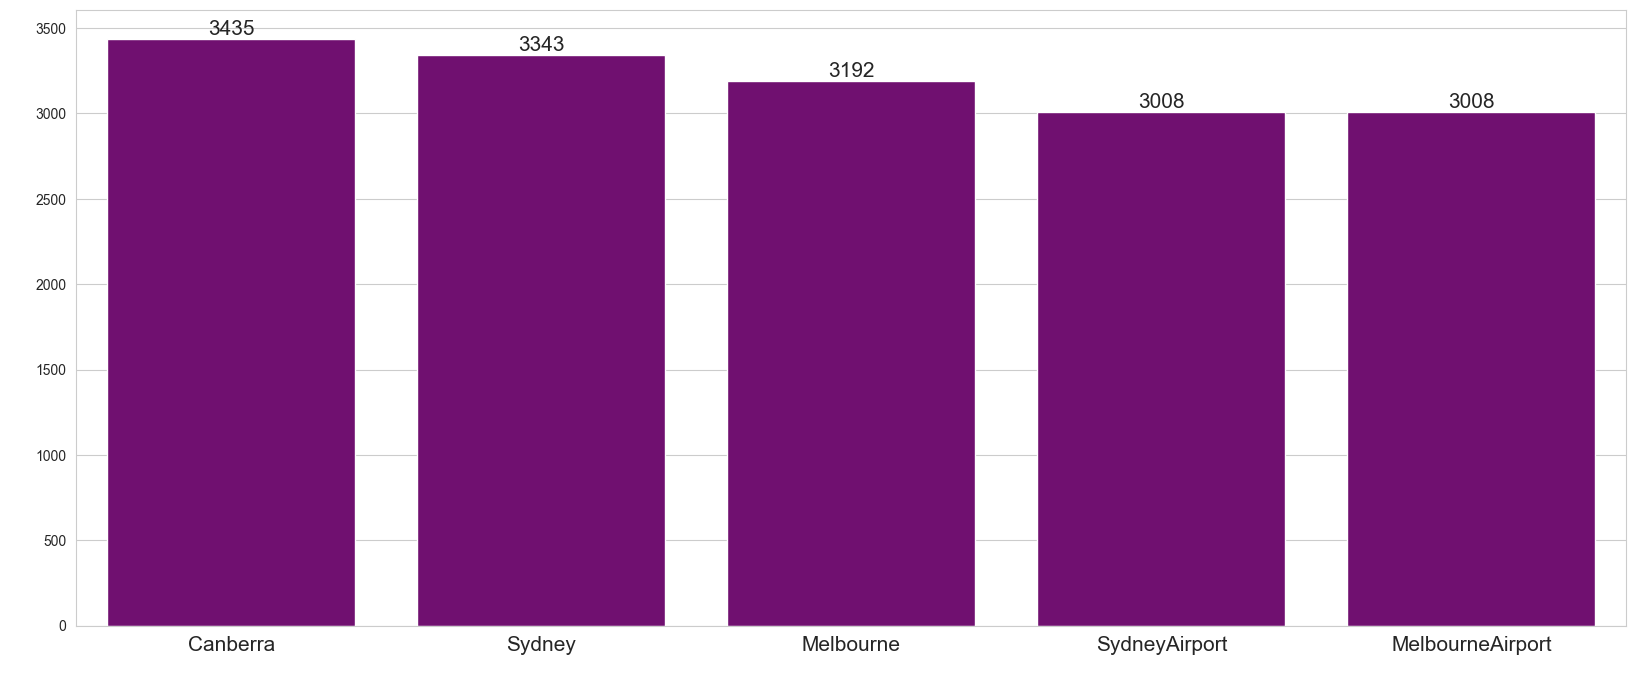

In [31]:
#Mejoramos el gráfico anterior para que se muestren los valores de frencuencia sobre cada columna 
top = data['Location'].value_counts().sort_values(ascending=False)[0:30]

#Configuramos el estilo de Seaborn (opcional)
sns.set_style("whitegrid")

#Creamos el gráfico de barras 
plt.figure(figsize=(20, 8))

ax = sns.barplot(x=top.index, y=top.values, color='purple')

#Aumentamos el tamaño de fuente de los ticks en el eje x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

#Agregamos etiquetas de datos en las columnas
for i, v in enumerate(top.values):
    ax.text(i, v, str(v), fontsize=15, ha='center', va='bottom')

#Aumentamos el tamaño de fuente de las etiquetas de los ejes x e y
ax.set_xlabel(' ', fontsize=16)
ax.set_ylabel(' ', fontsize=16)

#Rotamos las etiquetas del eje x para una mejor visualización (opcional)

plt.xticks(rotation=0)

plt.show()


In [32]:
#Ahora que el data set es más chico, ya que nos quedamos solo con las columnas que necesitamos
print('Cantidad de filas del data set:', data.shape[0])


Cantidad de filas del data set: 15986


In [35]:
print('Cantidad de nulos por columna')
#Calculamos la cantidad de valores nulos
nulos_por_columna = data.isnull().sum()

#Acomodamos los datos para poder ponerle titulo a las dos columnas que nos devuelve data.isnull().sum
nombres_columnas = ['Nombre_Columna', 'Cantidad_Nulos']  
nulos_con_nombres = pd.DataFrame({'Nombre_Columna': nulos_por_columna.index, 'Cantidad_Nulos': nulos_por_columna.values})

print(nulos_con_nombres)


Cantidad de nulos por columna
      Nombre_Columna  Cantidad_Nulos
0         Unnamed: 0               0
1               Date               0
2           Location               0
3            MinTemp             491
4            MaxTemp             486
5           Rainfall             787
6        Evaporation            1706
7           Sunshine            1948
8        WindGustDir            1457
9      WindGustSpeed            1455
10        WindDir9am             695
11        WindDir3pm             290
12      WindSpeed9am             261
13      WindSpeed3pm             249
14       Humidity9am             570
15       Humidity3pm             525
16       Pressure9am             735
17       Pressure3pm             726
18          Cloud9am            2677
19          Cloud3pm            2932
20           Temp9am             505
21           Temp3pm             496
22         RainToday             787
23      RainTomorrow             787
24  RainfallTomorrow             787
25      

In [38]:
#¿Qué porcentaje de nulos hay en cada columna?
#Calculamos la cantidad de valores nulos como porcentaje
porcentaje_nulos = (data.isnull().sum() / data.shape[0] * 100).round(2)

#Creamos un nuevo DataFrame con nombres de columnas personalizados
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']  # Cambia 'Nombre de columna' y 'Porcentaje de nulos' a los nombres que desees
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})

print(porcentaje_nulos_con_nombres)

   Nombre de columna  Porcentaje de nulos
0         Unnamed: 0                 0.00
1               Date                 0.00
2           Location                 0.00
3            MinTemp                 3.07
4            MaxTemp                 3.04
5           Rainfall                 4.92
6        Evaporation                10.67
7           Sunshine                12.19
8        WindGustDir                 9.11
9      WindGustSpeed                 9.10
10        WindDir9am                 4.35
11        WindDir3pm                 1.81
12      WindSpeed9am                 1.63
13      WindSpeed3pm                 1.56
14       Humidity9am                 3.57
15       Humidity3pm                 3.28
16       Pressure9am                 4.60
17       Pressure3pm                 4.54
18          Cloud9am                16.75
19          Cloud3pm                18.34
20           Temp9am                 3.16
21           Temp3pm                 3.10
22         RainToday              

In [18]:
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Flag
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0,si
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6,si
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8,si
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4,si
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6,si


In [19]:
#¿Cuántos nulos hay por cada Localización, por cada columna?
null_counts = data.isna().groupby(data['Location']).sum()
print(null_counts)

                  Unnamed: 0  Date  Location  MinTemp  MaxTemp  Rainfall  \
Location                                                                   
Canberra                   0     0         0        6        3        18   
Melbourne                  0     0         0      480      481       758   
MelbourneAirport           0     0         0        0        0         0   
Sydney                     0     0         0        4        2         7   
SydneyAirport              0     0         0        1        0         4   

                  Evaporation  Sunshine  WindGustDir  WindGustSpeed  ...  \
Location                                                             ...   
Canberra                 1603      1914          339            337  ...   
Melbourne                   3         1           14             14  ...   
MelbourneAirport            3         1           15             15  ...   
Sydney                     51        16         1038           1038  ...   
SydneyAirpo

Por ejemplo, Melboure-Evaporation el valor es 3 eso quiere decir que si tomamos todas las filas que en la columna tienen Location Melbure se encuentra que tenemos 3 datos nulos en Evaporation.
Se puede observar que Melbure, Melbure Airport, Sydney, Sydney Aiport tienen menos muchos menos cantidades de nulos que Canberra y Melnoure.

In [39]:
#esto lo podríamos eleminar
data.shape[0]

15986

In [21]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= data.value_counts('Location')

data_country.head()

Location
Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64

In [22]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = data.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)



           Location  Total_Nulos
0          Canberra         8375
1         Melbourne         9126
2  MelbourneAirport          106
3            Sydney         3525
4     SydneyAirport          220


Como era de esperar Canberra y Melbourne son las Locations con más valores nulos

In [23]:
data_country.head()

Location
Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64

In [41]:
#Cramos un DataFrame que contiene la cantidad de datos total por columna (nulos y no nulos)
data_country = data['Location'].value_counts().reset_index()
data_country.columns = ['Location', 'Total_Records']

In [48]:
#Moficar la cantidad de decimales
null_counts_country['Nulos_Por_Filas_AVG'] = round(null_counts_country['Total_Nulos'] / data_country["Total_Records"], 2)

In [49]:
null_counts_country.head()

,Location,Total_Nulos,Nulos_Por_Filas_AVG
0,Canberra,8375,2.44
1,Melbourne,9126,2.73
2,MelbourneAirport,106,0.03
3,Sydney,3525,1.17
4,SydneyAirport,220,0.07


Por ejemplo, a partir de estos datos podemos decir que Melboure, que es el que más nulos tiene, tiene 3 valores nulos por fila en promedio. 

In [27]:
print(data.value_counts('Location'), data.shape[0])


Location
Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64 15986


In [28]:
null_counts_country.head()

,Location,Total_Nulos,Nulos_Por_Filas_AVG
0,Canberra,8375,2.4
1,Melbourne,9126,2.7
2,MelbourneAirport,106,0.0
3,Sydney,3525,1.2
4,SydneyAirport,220,0.1


In [29]:
null_counts_country.Total_Nulos / data.shape[0]

0    0.523896
1    0.570875
2    0.006631
3    0.220505
4    0.013762
Name: Total_Nulos, dtype: float64

Las locations con menor cantidad de valores nulos, como hemos visto a lo largo de este análisis son:
- Aeropuerto de Sydney
- Aeropuerto de Melboure
- Canberra

Más allá de este análisis, la posterior exploración de datos la haremos con las cinco locations

In [52]:
"""all_cols = [ 'surface_covered_in_m2', 'surface_uncovered_in_m2', 'balcon', 'lavadero',
       'parrilla', 'piscina', 'pileta', 'sum', 'terraza', 'luminoso', 'garage',
       'cochera', 'amenities', 'jardin', 'quincho', 'patio', 'gimnasio',
       'vestidor', 'solarium', 'ambientes', 'place_new_Palermo', 'place_new_Recoleta'
       ,'lat','lon']"""

""""corr = data[ ['price_aprox_usd'] + all_cols ].corr()
corr.style.background_gradient (cmap = 'coolwarm')
"""

'"corr = data[ [\'price_aprox_usd\'] + all_cols ].corr()\ncorr.style.background_gradient (cmap = \'coolwarm\')\n'

In [51]:
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Flag
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0,si
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6,si
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8,si
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4,si
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6,si


In [53]:
def promedio(fech, data, variable):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = fecha - pd.DateOffset(years=1)
    fecha_anio_anterior_dia_desp = fecha_anio_anterior + pd.DateOffset(days=1)
    fecha_anio_anterior_dia_ant = fecha_anio_anterior - pd.DateOffset(days=1)
    temperaturas = data[(data['Date'] == fecha_anio_anterior) |
                      (data['Date'] == fecha_anio_anterior_dia_desp) |
                      (data['Date'] == fecha_anio_anterior_dia_ant)][variable]

<Axes: >

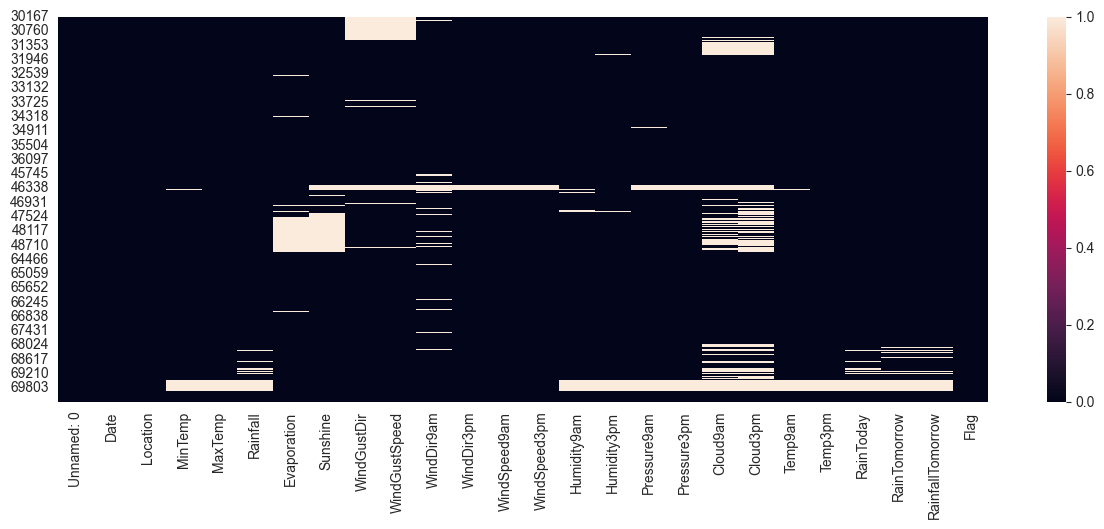

In [54]:
datos = data
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(datos.isnull())

El gráfico anterior de mapa de calor proporciona una visualización rápida y efectiva de la ubicación de los valores nulos en el DataFrame. Esto nos lleva a pensar, ¿qué columnas vamos a imputar?

Columnas a Imputar

In [35]:
Inputar = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Rainfall', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow']

In [36]:
data = data.sort_values(by='Date')

La decisión tomada para rellenar los datos nulos es rellenar los mismos con el valor de la fecha de la misma fecha del año pasado, si es que existe, ya que también podría ser nulo.
A continuación se encuentra el código que realice esta modificación de los datos 

In [37]:
for variable in Inputar:
#Rellenamos los valores nulos con el valor de la fecha del año pasado si existe
    data[variable] = data[variable].fillna(data[variable].shift())


¿Mejoraron la cantidad de nulos por columna? Lo vemos en el gráfico que se muestra a continuación

<Axes: >

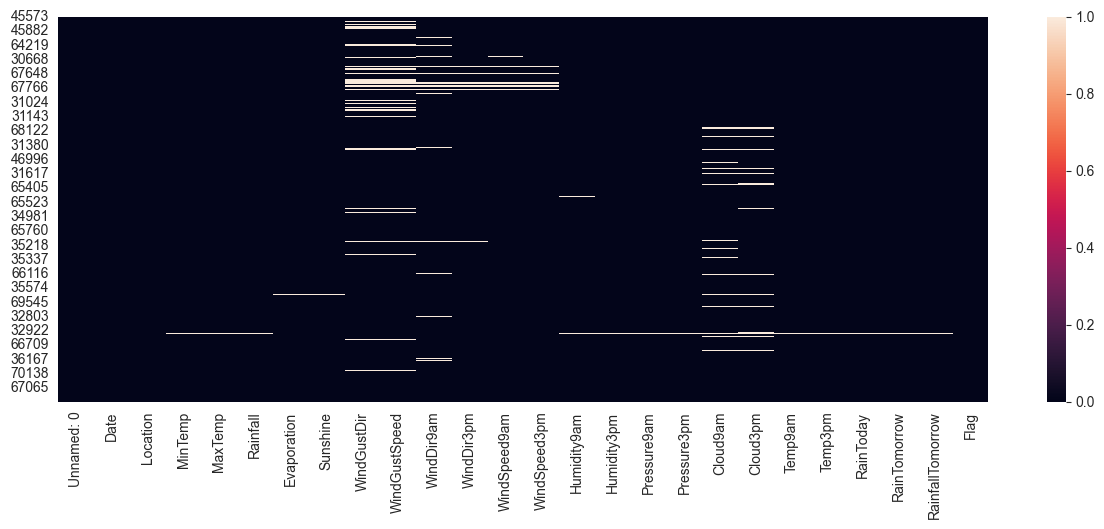

In [38]:
datos = data
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(datos.isnull())


Comprando este gráfico con el realizado antes de empezar a realziar elt ratamiento de los datos nulos, podemos ver que ha mejorado significatiavamente.
Analizamos a continaución en profundidad los resultados obtenidos

In [60]:
#Porcentaje de nulos por columna
(data.isnull().sum() / data.shape[0]).round(2)

Unnamed: 0          0.00
Date                0.00
Location            0.00
MinTemp             0.03
MaxTemp             0.03
Rainfall            0.05
Evaporation         0.11
Sunshine            0.12
WindGustDir         0.09
WindGustSpeed       0.09
WindDir9am          0.04
WindDir3pm          0.02
WindSpeed9am        0.02
WindSpeed3pm        0.02
Humidity9am         0.04
Humidity3pm         0.03
Pressure9am         0.05
Pressure3pm         0.05
Cloud9am            0.17
Cloud3pm            0.18
Temp9am             0.03
Temp3pm             0.03
RainToday           0.05
RainTomorrow        0.05
RainfallTomorrow    0.05
Flag                0.00
dtype: float64

Consideramos que el porcentaje de nulos ya es lo suficiente bajo, para que los pocos nulos que quedan no afecten el resultado final la decisión que tomamos es eliminarlos, como se puede ver en el código que desarrollamos a continuación. 

In [61]:
data.dropna(inplace=True)

In [62]:
#Chequeamos que efectivamento no haya más nulos
data.isnull().sum() / data.shape[0]

Unnamed: 0          0.0
Date                0.0
Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
Flag                0.0
dtype: float64

In [42]:

print(f"Tenemos {data.shape[0]} registros para trabajar la regresión")

Tenemos 13446 registros para trabajar la regresión


In [43]:
#Esto es para saber a cual sacarle variables Dummies
columnas_object = data.select_dtypes(include=['object'])


In [44]:
palabrasObject = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Flag"]
data = pd.get_dummies(data, columns = palabrasObject, drop_first=True)

In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data['Año'] = data['Date'].dt.year
data['Mes'] = data['Date'].dt.month
data['Dia'] = data['Date'].dt.day
data['Dia_Semana'] = data['Date'].dt.day_of_week

Eliminamos la fecha del dataframe

In [46]:
data.drop(columns= "Date", inplace=True, axis= 1)

In [47]:
anios = data.Año.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) 

Cantidad de años que tenemos datos: 11. Estos son: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


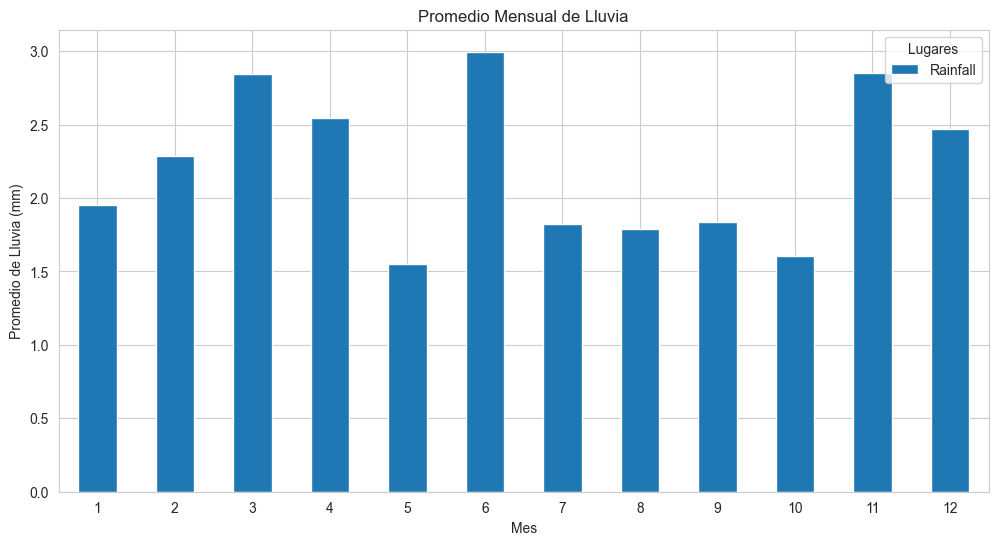

In [48]:
#Graficamos lluvia por mes
promedio_mensual = data.groupby(['Mes'])['Rainfall'].mean()
promedio_mensual.plot(kind='bar', figsize=(12, 6))
plt.title('Promedio Mensual de Lluvia')
plt.xlabel('Mes')
plt.ylabel('Promedio de Lluvia (mm)')
plt.xticks(rotation=0)
plt.legend(title='Lugares', loc='upper right')
plt.show()

In [49]:
data.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes,Año,Mes,Dia,Dia_Semana
45573,45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,...,False,False,False,False,False,True,2007,11,1,3
45574,45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,...,False,True,False,False,True,True,2007,11,2,4
45575,45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,...,False,False,False,False,True,True,2007,11,3,5
45576,45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,...,False,True,False,False,True,True,2007,11,4,6
45577,45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,...,False,False,False,False,True,False,2007,11,5,0


In [50]:
data = data.drop(columns = ['Unnamed: 0',], axis= 1)

In [51]:
allColumns = data.drop(columns = ["RainfallTomorrow"], axis= 1).columns


In [52]:
allColumns = allColumns.tolist()

In [53]:
allColumns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Sydney',
 'Location_SydneyAirport',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3p

In [54]:
corr = data[ ["RainfallTomorrow"] + allColumns].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,RainfallTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Melbourne,Location_MelbourneAirport,Location_Sydney,Location_SydneyAirport,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes,Año,Mes,Dia,Dia_Semana
RainfallTomorrow,1.000000,0.120025,-0.041592,0.258217,-0.022434,-0.278723,0.130706,0.049130,0.016489,0.171478,0.335472,-0.108373,-0.103052,0.170530,0.216374,0.060415,-0.068470,-0.023382,-0.058649,0.068275,0.050461,-0.022550,0.056349,-0.022142,-0.015434,-0.004780,-0.015072,-0.024645,0.030855,0.057457,-0.005723,0.039443,0.009276,-0.037666,-0.031495,-0.003211,0.016967,0.024360,-0.024551,0.018651,-0.000487,-0.020736,-0.032191,0.029107,0.020568,0.019977,0.041387,-0.011911,-0.006733,-0.027426,-0.010700,-0.000297,0.019718,-0.012350,-0.007558,0.000476,-0.006490,-0.029551,0.000981,0.018780,0.011892,0.055957,0.015233,-0.006128,-0.042483,-0.003081,0.195195,0.543506,0.023337,-0.010337,-0.003856,0.006388
MinTemp,0.120025,1.000000,0.691621,0.084598,0.533591,0.030920,0.194799,0.091008,0.163827,-0.173607,0.093615,-0.353673,-0.334212,0.111606,0.015586,0.901166,0.663314,0.020837,-0.166825,0.254332,0.291414,0.100821,0.045500,-0.098520,0.184133,0.086394,-0.129808,-0.132557,0.078048,0.022761,0.044298,0.060939,-0.037701,-0.060961,-0.107281,-0.035327,0.057490,0.031935,-0.064663,0.073426,0.068074,-0.073987,-0.045493,0.053686,-0.015145,0.009527,0.065120,-0.007257,-0.024686,-0.014511,-0.029246,0.153433,0.066834,-0.100184,0.178607,-0.015881,-0.135632,-0.146873,0.035709,0.074686,0.061555,-0.034993,-0.045874,-0.055756,-0.105329,-0.059633,0.053057,0.108487,0.106254,-0.233514,-0.001402,0.004561
MaxTemp,-0.041592,0.691621,1.000000,-0.089389,0.596002,0.405895,0.129451,-0.078814,0.076744,-0.358793,-0.426258,-0.266340,-0.345299,-0.170479,-0.223683,0.858398,0.977076,-0.063273,-0.107276,0.111980,0.141911,0.106513,0.023077,-0.008431,0.169775,0.103702,-0.025910,-0.019078,-0.022451,-0.008514,-0.001076,-0.040891,-0.093847,-0.072984,-0.037291,-0.073676,0.067327,0.043648,0.039725,0.097740,0.109925,-0.039593,0.000745,-0.021275,0.001222,-0.007719,-0.011351,-0.060144,-0.068013,-0.019199,-0.079417,0.128886,0.023010,-0.000640,0.180573,0.028201,-0.005650,-0.002960,-0.089812,0.026826,-0.006450,-0.129504,-0.088583,-0.038482,-0.006459,-0.083816,-0.195716,-0.099385,0.087033,-0.198892,0.007417,0.001583
Rainfall,0.258217,0.084598,-0.089389,1.000000,-0.064834,-0.201401,0.082301,0.069664,0.038720,0.256807,0.254568,-0.120011,-0.068556,0.179539,0.147055,-0.002235,-0.093758,-0.017956,-0.057509,0.057878,0.043595,-0.017432,0.041441,-0.083745,-0.028590,-0.038679,-0.022138,-0.011817,0.048221,0.048446,0.012727,0.045741,0.032821,-0.008222,-0.011716,0.019910,-0.004174,0.012556,-0.092571,-0.000293,-0.035249,-0.009923,-0.014585,0.046562,0.035696,0.039238,0.044795,0.025654,-0.002238,-0.012090,0.031411,-0.026241,0.025728,-0.061944,-0.048487,-0.036729,-0.027414,-0.014468,0.035582,0.027925,0.029315,0.064608,0.037325,-0.004108,-0.018905,0.022028,0.561536,0.230091,0.018301,-0.003685,-0.008563,-0.003397
Evaporation,-0.022434,0.533591,0.596002,-0.064834,1.000000,0.250489,0.294862,0.150329,0.221788,-0.444957,-0.265205,-0.338920,-0.323670,-0.077157,-0.111061,0.619261,0.560077,-0.044951,-0.040856,0.056553,0.058454,0.047679,0.001285,-0.01870

In [55]:
# Calcula la matriz de correlación
corr = data[["RainfallTomorrow"] + allColumns].corr()

# Calcula los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

# Ordena los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)

# Obtiene el orden según corr_abs
order = corr_with_target_abs.index

# Obtiene los coeficientes de correlación según el orden de corr_abs
corr_ordered = corr.loc[order, order]


corr_ordered.style.background_gradient(cmap = 'coolwarm')



,RainfallTomorrow,RainTomorrow_Yes,Humidity3pm,Sunshine,Rainfall,Cloud3pm,RainToday_Yes,Humidity9am,Cloud9am,WindGustSpeed,MinTemp,Pressure9am,Pressure3pm,Temp3pm,Location_Sydney,Temp9am,Location_MelbourneAirport,WindGustDir_SE,WindGustDir_ESE,WindDir3pm_SSW,Location_SydneyAirport,WindSpeed9am,WindDir3pm_WNW,MaxTemp,WindDir9am_SSW,WindGustDir_SSW,WindGustDir_W,WindDir9am_NW,WindGustDir_WNW,WindGustDir_S,WindDir3pm_NW,WindDir9am_S,WindDir9am_WNW,WindGustDir_NW,WindDir9am_N,WindDir9am_ESE,Location_Melbourne,Año,WindGustDir_ENE,Evaporation,WindGustDir_N,WindDir9am_NNW,WindDir9am_SE,WindDir9am_SSE,WindDir3pm_ESE,WindDir3pm_SE,WindDir9am_NE,WindDir9am_ENE,WindSpeed3pm,WindGustDir_NE,WindDir3pm_SW,WindGustDir_NNW,WindDir3pm_N,WindDir9am_SW,WindDir3pm_SSE,WindDir9am_WSW,Mes,WindGustDir_SW,WindDir3pm_NE,WindDir9am_W,WindDir3pm_NNW,Dia_Semana,WindDir3pm_W,WindGustDir_SSE,WindGustDir_NNE,Dia,WindGustDir_WSW,WindDir3pm_WSW,WindDir3pm_S,WindDir9am_NNE,WindDir3pm_NNE,WindDir3pm_ENE
RainfallTomorrow,1.000000,0.543506,0.335472,-0.278723,0.258217,0.216374,0.195195,0.171478,0.170530,0.130706,0.120025,-0.108373,-0.103052,-0.068470,0.068275,0.060415,-0.058649,0.057457,0.056349,0.055957,0.050461,0.049130,-0.042483,-0.041592,0.041387,0.039443,-0.037666,-0.032191,-0.031495,0.030855,-0.029551,0.029107,-0.027426,-0.024645,-0.024551,0.024360,-0.023382,0.023337,-0.022550,-0.022434,-0.022142,-0.020736,0.020568,0.019977,0.019718,0.018780,0.018651,0.016967,0.016489,-0.015434,0.015233,-0.015072,-0.012350,-0.011911,0.011892,-0.010700,-0.010337,0.009276,-0.007558,-0.006733,-0.006490,0.006388,-0.006128,-0.005723,-0.004780,-0.003856,-0.003211,-0.003081,0.000981,-0.000487,0.000476,-0.000297
RainTomorrow_Yes,0.543506,1.000000,0.411326,-0.391341,0.230091,0.329515,0.244102,0.205286,0.239498,0.190407,0.108487,-0.202169,-0.188975,-0.134689,0.019812,0.033209,-0.021624,0.018409,0.036173,0.084224,0.025002,0.092176,-0.044947,-0.099385,0.025726,0.067813,-0.035856,-0.038308,-0.030239,0.008628,-0.004161,0.007587,-0.038380,-0.014961,0.035647,0.000662,0.025633,0.006570,-0.057662,-0.039885,0.015968,0.005498,-0.005847,-0.004558,-0.006061,-0.006292,0.018595,0.013307,0.058881,-0.046065,0.022310,0.019667,0.020232,-0.004345,-0.005351,0.004233,0.022472,0.039957,-0.030502,-0.021601,0.019505,-0.000217,-0.005161,-0.019496,0.001375,-0.008507,0.008827,0.011787,-0.007138,0.001929,0.021718,-0.037155
Humidity3pm,0.335472,0.411326,1.000000,-0.582154,0.254568,0.427240,0.311229,0.566134,0.394319,-0.100822,0.093615,0.041510,0.116282,-0.485301,0.063774,-0.117954,-0.010638,0.052923,0.046255,0.154779,0.074101,-0.023410,-0.169007,-0.426258,0.090210,0.137309,-0.084094,-0.055755,-0.118503,0.122511,-0.120420,0.090964,-0.024997,-0.079165,-0.096283,0.022090,-0.001436,0.051984,0.001994,-0.265205,-0.077963,-0.028368,0.001528,0.034056,0.032906,0.024886,-0.000791,0.004890,-0.080948,0.008594,0.050179,-0.045085,-0.082930,0.043520,0.079188,0.023251,-0.052786,0.047158,-0.003110,-0.010194,-0.075270,0.004847,-0.110335,0.025597,0.005577,-0.004752,-0.034231,-0.036173,0.149873,-0.022659,-0.019764,0.032337
Sunshine,-0.278723,-0.391341,-0.582154,1.000000,-0.201401,-0.624508,-0.253533,-0.408832,-0.583294,-0.010162,0.030920,0.033723,-0.019814,0.425760,0.041305,0.205231,-0.060732,-0.027413,-0.036217,-0.106289,0.047776,-0.084073,0.061524,0.405895,-0.038191,-0.062360,0.022052,0.052077,0.053194,-0.032357,0.022379,-0.061973,0.059468,0.013930,-0.036906,-0.010203,-0.060655,-0.014114,0.064370,0.250489,-0.053820,-0.005136,0.000231,-0.008900,0.009929,0.017703,0.019434,0.013094,0.071759,0.107874,-0.075877,-0.010279,-0.026846,-0.043373,0.001815,-0.003103,0.024821,-0.073378,0.117287,0.028865,-0.006444,-0.002796,0.009217,0.026200,0.040401,0.017259,-0.011075,-0.045687,-0.051983,0.041674,-0.026685,0.064333
Rainfall,0.258217,0.230091,0.254568,-0.201401,1.000000,0.147055,0.561536,0.256807,0.179539,0.082301,0.084598,-0.120011,-0.068556,-0.093758,0.057878,-0.002235,-0.057509,0.048446,0.041441,0.064608,0.043595,0.069664,-0.018905,-0.089389

In [56]:
# Calcula la matriz de correlación
corr = data[["RainfallTomorrow"] + allColumns].corr()

# Ordena las columnas según su correlación con "RainfallTomorrow"
sorted_columns = corr["RainfallTomorrow"].sort_values(ascending=False).index
corr_sorted = corr.reindex(sorted_columns)[sorted_columns]

# Crea un mapa de calor con el mapa de colores "coolwarm"



In [57]:
# # Calcula la matriz de correlación
# corr = data[["RainfallTomorrow"] + allColumns].corr()

# # Calcula los coeficientes de correlación en valor absoluto
# corr_abs = corr.abs()

# # Ordena los coeficientes de correlación en valor absoluto
# corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)

# # Obtiene el orden según corr_abs
# order = corr_with_target_abs.index

# # Obtiene las top 15 variables con mayor aporte
# top_15_variables = order[1:16]  # Excluimos la variable "RainfallTomorrow" en sí misma

# features = top_15_variables.tolist()
# print(features)


In [58]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes,Año,Mes,Dia,Dia_Semana
45573,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,...,False,False,False,False,False,True,2007,11,1,3
45574,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,...,False,True,False,False,True,True,2007,11,2,4
45575,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,...,False,False,False,False,True,True,2007,11,3,5
45576,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,...,False,True,False,False,True,True,2007,11,4,6
45577,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,...,False,False,False,False,True,False,2007,11,5,0


In [59]:
#Importamos librerias de LR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [60]:
#Separamos nuestro dataset en la variable independiente y las variables dependientes
X = data.drop(columns='RainfallTomorrow', axis=0)
y = data['RainfallTomorrow']

In [61]:
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Sydney', 'Location_SydneyAirport', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'Wi

In [62]:
scaler = StandardScaler()

In [63]:
X_scld = scaler.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression(fit_intercept=True)

In [66]:
model.fit(X_train, y_train)

print(model.coef_)

print(model.intercept_)

[-0.17604433  0.64313283  0.96617618 -0.12028355 -0.37063233  1.201623
 -0.01650501 -0.58143549 -0.19100659  1.37089509  1.76531512 -1.54888148
 -0.13917452 -0.02961547 -0.42186225  0.37071403 -0.13920865 -0.19304342
  0.24948425  0.13976733 -0.1724772   0.07282572 -0.3450637  -0.15098952
 -0.19463874 -0.2723553  -0.21011343 -0.2135993   0.1989384  -0.1381636
 -0.37919567 -0.20366958 -0.31216946 -0.14300002 -0.21230949  0.01248156
  0.02050884 -0.30486417 -0.02095827 -0.11480831 -0.19716595 -0.18474194
 -0.04357354 -0.01524083 -0.03839696  0.03886153 -0.04617759 -0.10489233
 -0.15293873 -0.11516779  0.09529006  0.07755906  0.07973821  0.02549131
 -0.01802874  0.11417884  0.06411661  0.20584009  0.14997209  0.19740075
  0.18342802  0.16109044  0.27147049  0.15210293  0.19229037 -0.15480887
  3.06546961  0.01663882 -0.02484244  0.05097736  0.0535617 ]
2.2240651478133957


In [70]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.34124380460032244, 0.37689667856332065)

In [72]:
y_pred_test = model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("R2: ", round(r2, 2))

R2:  0.38


Ridge

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size = 0.2)

model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2.0, 3.0, 5.0,6.0, 7.0, 10.0, 100, 200, 1000], 
                                   fit_intercept=True, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)

print(model_fit_ridge_cv.alpha_)

print(model_fit_ridge_cv.best_score_)

100.0
0.33614394016687904


In [79]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True)
model_fit_ridge = model_ridge.fit(X_train, y_train)
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))

[-2.03781435e-01  5.07583207e-01  8.05019008e-01 -5.21750913e-02
 -3.82361197e-01  9.53743087e-01 -2.40911015e-02 -4.70279927e-01
 -1.34794914e-01  1.23894145e+00  1.13523941e+00 -9.75199302e-01
 -1.24949183e-01 -2.81990211e-02 -2.05438947e-01  3.59569460e-01
 -1.02519517e-01 -2.32550545e-01  2.52136466e-01  1.16292710e-01
 -1.97927153e-01  1.24017166e-02 -2.98947784e-01 -2.16531332e-01
 -1.84004269e-01 -2.30533628e-01 -2.03733734e-01 -2.12415997e-01
  1.31147924e-01 -1.50143426e-01 -3.64744270e-01 -1.95592405e-01
 -2.95503030e-01 -1.53010375e-01 -1.57220243e-01  1.31664746e-02
  1.43663221e-02 -1.82613816e-01  4.40313404e-03  2.10589781e-02
 -1.07144580e-01 -8.01194345e-02  6.48894629e-02  9.04368699e-02
  4.36085794e-02  1.64893709e-01 -4.12328114e-02 -7.34616838e-02
 -7.51421854e-02 -2.10406298e-02  1.36657936e-01  6.75816249e-02
  1.01083343e-01  3.69489126e-02 -4.67376858e-03  7.73081066e-02
  4.48023297e-02  1.86478767e-01  1.42620353e-01  1.55133853e-01
  1.52138716e-01  1.65534

In [80]:
model_fit_ridge.score(X_test, y_test)

0.3649450429520793

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size = 0.2)

model_lasso_cv = linear_model.LassoCV(alphas= [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.95, 0.97, 0.1, 0.12, 0.15, 0.2, 0.3, 1.0,2.0, 3.0, 5.0,6.0, 7.0, 10.0, 100.0], 
                                   fit_intercept=True, cv=10, max_iter=10)

model_fit_lasso_cv = model_lasso_cv.fit(X_train, y_train)


c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\ap1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246.54392394551542, tolerance: 50.955385288842955
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\ap1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.890128087427, tolerance: 50.955385288842955
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\ap1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.84263320977334, tolerance: 50.955385288842955
  mode

In [85]:
print(model_fit_lasso_cv.alpha_)

print(model_fit_lasso_cv.score(X_train, y_train))

0.01
0.34903110778175006


In [87]:
best_alpha = model_fit_lasso_cv.alpha_
model_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept = True)
model_fit_lasso = model_lasso.fit(X_train, y_train)
print(model_fit_lasso.coef_)
print(model_fit_lasso.intercept_)
print(model_fit_lasso.score(X_train, y_train))

[-1.19051960e-01  9.89631980e-02  7.65718131e-01 -1.65726962e-02
 -3.67589143e-01  1.01081504e+00  8.39034763e-04 -5.58540972e-01
 -4.41264901e-02  1.17433685e+00  1.25325032e+00 -1.10310540e+00
 -1.68566566e-01  4.17188673e-04 -9.36952314e-02  5.93216403e-01
 -2.15596832e-01 -2.43345346e-01  1.30430108e-01  5.06190157e-02
 -7.30814510e-02  1.40414339e-01 -9.95805653e-02 -1.03865233e-01
 -1.16739647e-01 -1.31683271e-01 -1.09408570e-01  0.00000000e+00
  2.20901122e-01  2.05491811e-03 -1.27302263e-01 -4.73881012e-02
 -1.64632196e-01 -4.28636148e-02 -8.68412043e-02  7.95852960e-03
  2.86560333e-02 -2.33730933e-01 -4.55850714e-02 -3.25503881e-02
 -1.31423548e-01 -8.91591433e-02  2.50222764e-02  5.84113924e-02
  3.67532224e-02  6.14572966e-02 -1.52714695e-01  0.00000000e+00
 -5.04460689e-02 -3.16620672e-02  1.03543829e-02  9.81042975e-03
 -0.00000000e+00 -1.69977014e-02 -2.54465300e-02  2.58266211e-02
 -8.60247518e-03  3.17553108e-02  2.23265847e-02  7.14180400e-02
  2.10785702e-02  0.00000